## Информация о сетевых интерфейсах

In [ ]:
# 1. Сетевые интерфейсы

# Импортируем библиотеку psutil для работы с системной информацией
import psutil

# Получаем информацию о состоянии всех сетевых интерфейсов (адаптеров)
interfaces = psutil.net_if_stats()

# Проходим по всем интерфейсам и выводим информацию
for interface, stats in interfaces.items():
    # Выводим имя интерфейса (адаптера)
    print(f"Интерфейс: {interface}")

    # Проверяем, активен ли интерфейс
    print(f"  Активен: {stats.isup}")

    # Выводим скорость интерфейса в Мбит/с
    print(f"  Скорость: {stats.speed} Мбит/с")

    # Определяем дуплексный режим
    if stats.duplex == 2:
        duplex_mode = 'Полный'  # Полный дуплекс
    elif stats.duplex == 1:
        duplex_mode = 'Полудуплексный'  # Полудуплексный режим
    else:
        duplex_mode = 'Неизвестно'  # Неизвестный режим

    # Выводим дуплексный режим
    print(f"  Дуплексный режим: {duplex_mode}")

    # Выводим максимальный размер пакета (MTU)
    print(f"  MTU: {stats.mtu}\n")  # Отображаем MTU и добавляем пустую строку для разделения

In [ ]:
# Вывод информации о сетевых интерфейсах

Интерфейс: Ethernet
  Активен: False
  Скорость: 0 Мбит/с
  Дуплексный режим: Полный
  MTU: 1500

Интерфейс: Сетевое подключение Bluetooth
  Активен: False
  Скорость: 3 Мбит/с
  Дуплексный режим: Полный
  MTU: 1500

Интерфейс: vEthernet (Default Switch)
  Активен: True
  Скорость: 4294 Мбит/с
  Дуплексный режим: Полный
  MTU: 1500

Интерфейс: Loopback Pseudo-Interface 1
  Активен: True
  Скорость: 1073 Мбит/с
  Дуплексный режим: Полный
  MTU: 1500

Интерфейс: Беспроводная сеть
  Активен: True
  Скорость: 144 Мбит/с
  Дуплексный режим: Полный
  MTU: 1500

Интерфейс: Подключение по локальной сети* 1
  Активен: False
  Скорость: 0 Мбит/с
  Дуплексный режим: Полный
  MTU: 1500

Интерфейс: Подключение по локальной сети* 10
  Активен: False
  Скорость: 0 Мбит/с
  Дуплексный режим: Полный
  MTU: 1500

## Перехват фреймов

In [ ]:
# 2. Канальный
from scapy.all import sniff, Ether

# Функция для обработки перехваченных кадров
def frame_handler(frame):
    # Проверяем наличие Ethernet слоя
    if frame.haslayer(Ether):
        eth_layer = frame[Ether]

        # Извлекаем поля Ethernet-фрейма
        src_mac = eth_layer.src
        dst_mac = eth_layer.dst
        eth_type = eth_layer.type
        payload = eth_layer.payload

        # Проверяем, является ли фрейм ARP
        if eth_type == 0x0806:  # ARP
            # Предполагаем, что последние 4 байта - это контрольная сумма (если она присутствует)
            crc = payload[-4:] if len(payload) >= 4 else None
            payload = payload[:-4] if crc else payload  # Убираем контрольную сумму из полезной нагрузки
        else:
            crc = None  # Если это не ARP, то контрольная сумма не используется, присваивается значение None

        # Ограничиваем количество байтов для вывода поля данных
        payload_data = bytes(payload)
        max_length = 0  # Максимальное количество байтов для вывода
            # Проверяем, снято ли ограничение
        if max_length == 0:
            payload_output = payload_data  # Выводим все данные без ограничения
        else:
            payload_output = payload_data[:max_length]  # Ограничиваем количество байтов
        
        # Форматируем вывод Ethernet фрейма в виде таблицы
        print("\n=== Ethernet Frame ===")
        print("-" * 40)
        print(f"| {'MAC-адрес источника:':<30} | {src_mac} (6 байт) |")
        print(f"| {'MAC-адрес назначения:':<30} | {dst_mac} (6 байт) |")
        print(f"| {'Тип протокола:':<30} | {eth_type} (0x{eth_type:X}) (2 байта) |")
        print(f"| {'Поле данных:':<30} | {payload_output} ({len(payload_output)} байт) |")
        print(f"| {'Контрольная сумма (CRC):':<30} | {crc} (4 байта) |")
        print(f"| {'Размер Ethernet заголовка:':<30} | {len(eth_layer)} байт |")
        print("-" * 40)

# Начинаем перехват кадров
print("Начинаем перехват кадров...\n")
sniff(prn=frame_handler, count=2)  # Перехватываем 2 кадра


In [ ]:
# Вывод двух перехваченных фреймов

=== Ethernet Frame ===
----------------------------------------
| MAC-адрес источника:           | 3c:55:76:5a:1a:98 (6 байт) |
| MAC-адрес назначения:          | 64:64:4a:3c:da:66 (6 байт) |
| Тип протокола:                 | 2048 (0x800) (2 байта) | # протокол IPv4
| Поле данных:                   | b"E\x00\x01n'W@\x00\x80\x06>\xd3\xc0\xa8\x1f\x80" (16 байт) |
| Контрольная сумма (CRC):       | None (4 байта) | # так как протокол 0х800 то отсутствует контрольная сумма в кадре
| Размер Ethernet заголовка:     | 380 байт |
----------------------------------------

=== Ethernet Frame ===
----------------------------------------
| MAC-адрес источника:           | 64:64:4a:3c:da:66 (6 байт) |
| MAC-адрес назначения:          | 3c:55:76:5a:1a:98 (6 байт) |
| Тип протокола:                 | 2048 (0x800) (2 байта) |
| Поле данных:                   | b'E\x00\x00\x89\xdcd@\x002\x06\xd8\xaa\x8d_%\xd8' (16 байт) |
| Контрольная сумма (CRC):       | None (4 байта) | # так как протокол 0х800 то отсутствует контрольная сумма в кадре
| Размер Ethernet заголовка:     | 151 байт |
----------------------------------------

## Перехват пакетов

In [ ]:
# 3. Сетевой

from scapy.all import sniff, IP, IPv6, ICMP

# Функция для обработки перехваченных пакетов
def packet_handler(packet):
    # Проверяем наличие IP-слоя
    if packet.haslayer(IP):
        ip_layer = packet[IP]
        print("\n=== IPv4 Packet ===")
        print("-" * 40)
        print(f"| {'Версия:':<30} | {ip_layer.version} (IPv4) |")  # 4 бита
        print(f"| {'Длина заголовка:':<30} | {ip_layer.ihl * 4} байт |")  # 4 бита
        print(f"| {'Тип обслуживания:':<30} | {ip_layer.tos} |")  # 8 бит
        print(f"| {'Длина пакета:':<30} | {len(packet)} байт |")  # 16 бит
        print(f"| {'Идентификация:':<30} | {ip_layer.id} |")  # 16 бит
        print(f"| {'Флаги:':<30} | {ip_layer.flags} |")  # 3 бита
        print(f"| {'Смещение фрагмента:':<30} | {ip_layer.frag} |")  # 13 бит
        print(f"| {'TTL:':<30} | {ip_layer.ttl} |")  # 8 бит
        print(f"| {'Протокол:':<30} | {ip_layer.proto} (0x{ip_layer.proto:X}) |")  # 8 бит
        print(f"| {'Контрольная сумма:':<30} | {ip_layer.chksum} |")  # 16 бит
        print(f"| {'Источник IP:':<30} | {ip_layer.src} |")  # 32 бит
        print(f"| {'Назначение IP:':<30} | {ip_layer.dst} |")  # 32 бит
        print("-" * 40)
        
    # Проверяем наличие IPv6-слоя
    elif packet.haslayer(IPv6):
        ipv6_layer = packet[IPv6]
        print("\n=== IPv6 Packet ===")
        print("-" * 40)
        print(f"| {'Версия:':<30} | {ipv6_layer.version} (IPv6) |")  # 4 бита
        print(f"| {'Traffic Class:':<30} | {ipv6_layer.tc} |")  # 8 бит
        print(f"| {'Flow Label:':<30} | {ipv6_layer.fl} |")  # 20 бит
        print(f"| {'Длина полезной нагрузки:':<30} | {len(ipv6_layer.payload)} байт |")  # 16 бит
        print(f"| {'Следующий заголовок:':<30} | {ipv6_layer.nh} (0x{ipv6_layer.nh:X}) |")  # 8 бит
        print(f"| {'TTL:':<30} | {ipv6_layer.hlim} |")  # 8 бит
        print(f"| {'Источник IPv6:':<30} | {ipv6_layer.src} |")  # 128 бит
        print(f"| {'Назначение IPv6:':<30} | {ipv6_layer.dst} |")  # 128 бит
        print("-" * 40)
        
# Начинаем перехват пакетов
print("Начинаем перехват пакетов...\n")
sniff(prn=packet_handler, count=2)  # Перехватываем 2 пакета

In [ ]:
# Вывод двух перехваченных пакетов

=== IPv4 Packet ===
----------------------------------------
| Версия:                        | 4 (IPv4) |
| Длина заголовка:               | 20 байт |
| Тип обслуживания:              | 0 |
| Длина пакета:                  | 60 байт |
| Идентификация:                 | 13849 |
| Флаги:                         | DF |
| Смещение фрагмента:            | 0 |
| TTL:                           | 50 |
| Протокол:                      | 6 (0x6) |
| Контрольная сумма:             | 32599 |
| Источник IP:                   | 57.129.25.95 |
| Назначение IP:                 | 172.168.32.128 |
----------------------------------------

=== IPv4 Packet ===
----------------------------------------
| Версия:                        | 4 (IPv4) |
| Длина заголовка:               | 20 байт |
| Тип обслуживания:              | 0 |
| Длина пакета:                  | 151 байт |
| Идентификация:                 | 13850 |
| Флаги:                         | DF |
| Смещение фрагмента:            | 0 |
| TTL:                           | 50 |
| Протокол:                      | 6 (0x6) |
| Контрольная сумма:             | 32501 |
| Источник IP:                   | 57.129.25.95 |
| Назначение IP:                 | 172.168.32.128 |
----------------------------------------

## Тест UDP

In [ ]:
# 4. Транспортный (transport)

#udp_server.py
import socket

def start_udp_server():
    # Создаем UDP сокет
    server_socket = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
    server_socket.bind(('localhost', 5000))
    print("UDP сервер запущен. Ожидание датаграмм...")

    # Получение и обработка датаграмм
    while True:
        data, addr = server_socket.recvfrom(1024)
        datagram = data.decode()
        print(f"Получена датаграмма от {addr}: {datagram}")
        response = f"Датаграмма '{datagram}' получена."
        server_socket.sendto(response.encode(), addr)

# Запуск сервера
start_udp_server()


# udp_client.py

import socket

def run_udp_client():
    # Создаем UDP сокет
    client_socket = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)

    # Отправка датаграмм
    while True:
        message = input("Введите датаграмму (или 'exit' для выхода): ")
        if message.lower() == 'exit':
            break
        client_socket.sendto(message.encode(), ('localhost', 5000))
        
        # Получение ответа
        data, addr = client_socket.recvfrom(1024)
        print("Ответ от сервера:", data.decode())

    # Закрытие соединения
    client_socket.close()

# Запуск клиента
run_udp_client()

### udp_server.py
Cоздается сервер с сокетом UDP с помощью socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
Сервер затем связывается с указанным адресом и портом (localhost и порт 5000)
При запуске сервера появляется сообщение:

**UDP сервер запущен. Ожидание датаграмм...**

### udp_client.py
Клиент также создаёт UDP сокет с аналогичной командой
При запуске клиента появляется сообщение:

**Введите датаграмму (или 'exit' для выхода):**

### Тест
После ввода сообщения клиент отправляет его на адрес и порт, к которым привязан сервер
Затем клиент ожидает ответа от сервера также с помощью и выводит его на экран

**Введите датаграмму (или 'exit' для выхода): Hello**
**Ответ от сервера: Датаграмма 'Hello' получена.**
**Введите датаграмму (или 'exit' для выхода):**

Как только сервер получает сообщение он выводит информацию о полученном сообщении и адресе отправителя (локальный IP и номер порта), затем отправляет ответ обратно отправителю

**Получена датаграмма от ('127.0.0.1', 50861): Hello**

## Сеансовый тест

In [ ]:
# 5. Сеансовый (session)

#1 
// Указываем, что используем синтаксис версии 3 Protocol Buffers
syntax = "proto3";

// Определяем сервис SessionManager
service SessionManager {
    // Определяем метод StartSession, который принимает SessionRequest и возвращает SessionResponse
    rpc StartSession (SessionRequest) returns (SessionResponse);
    
    // Определяем метод EndSession, аналогичный StartSession
    rpc EndSession (SessionRequest) returns (SessionResponse);
}

// Описание структуры сообщения для запроса сессии
message SessionRequest {
    string session_id = 1; // Поле session_id, которое содержит идентификатор сессии
}

// Описание структуры сообщения для ответа
message SessionResponse {
    string message = 1; // Поле message, которое будет содержать сообщение о статусе
}

#2
#Эта команда генерирует Python-файлы (session_pb2.py и session_pb2_grpc.py) на основе описания сервиса и сообщений в session.proto.
!python -m grpc_tools.protoc -I. --python_out=. --grpc_python_out=. session.proto

# server.py
import grpc
from concurrent import futures
import session_pb2
import session_pb2_grpc

# Реализация сервиса SessionManager
class SessionManager(session_pb2_grpc.SessionManagerServicer):
    # Реализация метода StartSession
    def StartSession(self, request, context):
        # Возвращаем сообщение о том, что сессия запущена
        return session_pb2.SessionResponse(message=f"Сессия {request.session_id} запущена.")

    # Реализация метода EndSession
    def EndSession(self, request, context):
        # Возвращаем сообщение о том, что сессия завершена
        return session_pb2.SessionResponse(message=f"Сессия {request.session_id} завершена.")

# Функция для запуска сервера
def serve():
    # Создаем gRPC сервер с многопоточностью
    server = grpc.server(futures.ThreadPoolExecutor(max_workers=10))
    # Регистрируем сервис SessionManager на сервере
    session_pb2_grpc.add_SessionManagerServicer_to_server(SessionManager(), server)
    # Указываем порт, на котором будет работать сервер
    server.add_insecure_port('[::]:50051')
    server.start()  # Запускаем сервер
    print("gRPC сервер запущен на порту 50051...")
    server.wait_for_termination()  # Ожидаем завершения работы сервера

# Запуск сервера
serve()


# client.py
import grpc
import session_pb2
import session_pb2_grpc

# Функция для запуска клиента
def run():
    # Создаем соединение с gRPC сервером
    with grpc.insecure_channel('localhost:50051') as channel:
        # Создаем "stub" для общения с сервисом SessionManager
        stub = session_pb2_grpc.SessionManagerStub(channel)
        session_id = "12345"  # Идентификатор сессии
        
        # Отправляем запрос на запуск сессии
        start_response = stub.StartSession(session_pb2.SessionRequest(session_id=session_id))
        # Выводим ответ о запуске сессии
        print(start_response.message)

        # Отправляем запрос на завершение сессии
        end_response = stub.EndSession(session_pb2.SessionRequest(session_id=session_id))
        # Выводим ответ о завершении сессии
        print(end_response.message)

# Запуск клиента
run()

### 1
Файл session.proto:
Описывает сервис SessionManager с методами StartSession и EndSession.
Определяет сообщения SessionRequest и SessionResponse для передачи данных между клиентом и сервером.

### 2
Команда компиляции .proto файла:
Генерирует Python файлы session_pb2.py и session_pb2_grpc.py, необходимые для работы с gRPC.

### server.py
Содержит реализацию сервиса SessionManager с методами для запуска и завершения сессии.
Создает gRPC сервер и регистрирует в нем сервис SessionManager.

### client.py
Подключается к серверу по адресу localhost:50051.
Отправляет запросы StartSession и EndSession с идентификатором сессии.
Выводит ответы сервера на экран.

### Тест
При запуске сервера появляется сообщение:

**gRPC сервер запущен на порту 50051...**

При запуске клиента появляется сообщение:

**Сессия 12345 запущена.
Сессия 12345 завершена.**


Код показывает:

1. Как использовать gRPC для создания сервера, который принимает и обрабатывает удаленные вызовы, и клиента, который взаимодействует с сервером.
2. Сеансовое управление: В примере реализован простой сервис для управления сессиями. Сервер обрабатывает два метода:
            *StartSession: принимает запрос с идентификатором сессии и возвращает подтверждение, что сессия началась.
             EndSession: принимает тот же идентификатор и подтверждает завершение сессии.*
3. Как использовать Protocol Buffers (.proto файл) для определения интерфейса сервиса и структуры сообщений, которые затем компилируются в Python-код. Этот сгенерированный код затем используется для реализации сервиса и создания клиента.
4. Применение многопоточности: Сервер использует ThreadPoolExecutor, позволяя ему обрабатывать несколько запросов параллельно.

## Тест представления данных

In [ ]:
# 6. Уровень представления

import gzip
import base64
from cryptography.fernet import Fernet

# Генерация ключа для шифрования
key = Fernet.generate_key()
cipher_suite = Fernet(key)

# Данные для шифрования
data = "Пример данных для шифрования и сжатия." * 5

# Шифрование данных
encrypted_data = cipher_suite.encrypt(data.encode('utf-8'))
print(f"Зашифрованные данные: {base64.urlsafe_b64encode(encrypted_data).decode()}")
print(f"Размер зашифрованных данных: {len(encrypted_data)} байт")

# Сжатие зашифрованных данных
compressed_data = gzip.compress(encrypted_data)
print(f"Сжатые данные: {base64.urlsafe_b64encode(compressed_data).decode()}")
print(f"Размер сжатых данных: {len(compressed_data)} байт")

# Распаковка сжатых данных
decompressed_data = gzip.decompress(compressed_data)

# Расшифровка данных
decrypted_data = cipher_suite.decrypt(decompressed_data).decode('utf-8')
print(f"Расшифрованные данные: {decrypted_data}")

### Этот код демонстрирует процесс шифрования и сжатия данных, а затем их восстановления

### Тест
Зашифрованные данные:  Z0FBQUFBQm5KeWFwNm9GenhBcFlPU0h1Z0pScW8yUWNmaTg4SEJEQVQ0OTZsVW1mVWMzcy1qbTEzaURBNGxaaEV5XzdNWTRiWkNLd21iZUJic1BrdEpxRzFUdF93T25WdmdiVVp5TjBTT2c5TF9NcFRJTEpGcDh6ZTFIM29leXA0SDItQjF5TkRIUFhrUnpINWxUZ0l3a2RBYlV1d1N3R3lEdm5IajBCUEtpUDFMNk83NWVJV0RheXhMNXdRa0pwREh3VjNobG5hWkxlbU5rMUZvSHJwc2VMYjU4eUV3ZGNpaUNZQ25KQkdHV3Z3dzM5VVhDYi02T2JTVUhsMXNibmdkVVlKanZtLUZ4eE04cVV1bTBkWTlJdDZJUjdyOWY0RjBSMFlnLTQ0NDl6Z2FJS214OGZyMUxLaXZWYjU4VHpZOEcyS3dDUHNQUGhrSU9XcDhVUERMbGM5Nkx3LUFRQjJsZHA2akU3T0h2azNPQzg3Y045czFfVGFrU3BuOGNVMEhJajJPU2xRUEU0ZktCbXFKOWVSSjhveE1HLUZHZzIySFpLYm8zUXpBYktCQ05nTVR0aWR6UFpWVndEaUlUNVJjd0RUUlAzWGxjX2V4blZPQ0VaLUZhWDZkUFlKR1BRdERHV1Utei1hOS10dmNoYzFBWVc5VEJiamNLNW5CUmZhVjhLZmJmUTBkLU8tZjFGdFo5ODhDVW1KcHRlaWpUVXpnPT0=  
Размер зашифрованных данных: 548 байт  
Сжатые данные: H4sIAKkmJ2cC_xXNSZKqMAAA0BOlikkMi14wCGFQAhIUNhZhklFUmgCn7__fBV6t_qeNzpZN8svcV3VK_Cv6rZ3w_RKCvGogRJqhRpIi92SoSC5QTvwYmOoUp8T9vjeE4kmuouG2ip0S_uZudt8dH8YP4YLzUl6Xbhrn6teI_zFNmeY05wL3kkvsptkpAANH67GAjfu3BHhz6qbdYVKiW_7MqszVhG1HIadhvMe7J_PJT2zci21TuwoHMmA7FYfPZjlnrlcOl484U07f06AFuJ1bkTaMnuholnVbGBMVctcpkH16Jajnv3SsC5I47TIAc13P8E1B65IFHuW7fD4USrJ5EIuqYEkScpeZ7Y7rLD68J7bLPG_ItoTaAku0_EX42dn7cJEmx4fa7IHgNqoAl9Mcnt6eijpRN9HR7zi_LlH1HWXacR5oRDdiv41z7AJ6lyteHtKGXowNd6toBp1YKAUpexGBXqavpl_oczU2x4zSOmdHY0SHMmRGFWLz3aNcx9jXTykws7tc4MSxcDAb1o2AHWQKmJf8mfNqclMijba5exi1sMpi6Fa0CrgCKDizTlVINTJ4Exz2bQR2eufnz9nPc1BJAIABJA==  
Размер сжатых данных: 463 байт  
Расшифрованные данные: Пример данных для шифрования и сжатия.Пример данных для шифрования и сжатия.Пример данных для шифрования и сжатия.Пример данных для шифрования и сжатия.Пример данных для шифрования и сжатия.

## Тест API

In [ ]:
# 7. Прикладной уровень

import requests

# URL для GET-запроса
get_url = 'https://jsonplaceholder.typicode.com/posts'

# Отправка GET-запроса
response_get = requests.get(get_url)

# Проверка кода ответа
if response_get.status_code == 200:
    print("GET-запрос успешен!")
    print("Содержимое страницы:")
    print(response_get.text[:500])  # Выводим первые 500 символов
else:
    print(f"Ошибка при GET-запросе: {response_get.status_code}")

# URL для POST-запроса
post_url = 'https://jsonplaceholder.typicode.com/posts'

# Данные для отправки
post_data = {
    'title': 'foo',
    'body': 'bar',
    'userId': 1
}

# Отправка POST-запроса
response_post = requests.post(post_url, json=post_data)

# Проверка кода ответа
if response_post.status_code == 201:
    print("POST-запрос успешен!")
    print("Полученные данные:")
    print(response_post.json())
else:
    print(f"Ошибка при POST-запросе: {response_post.status_code}")

### Код служит примером для работы с HTTP-запросами, демонстрируя, как получать и отправлять данные через RESTful API. Он полезен для разработки приложений, которые взаимодействуют с веб-сервисами.

**GET-запрос**

Цель: 
Получить данные с указанного URL.
https://jsonplaceholder.typicode.com/posts — это тестовый API, который возвращает фейковые данные.

Действия:
Отправляется GET-запрос к указанному URL.
Если запрос успешен (код ответа 200), выводится сообщение об успешном запросе и первые 500 символов содержимого страницы.
Если возникла ошибка, выводится код ошибки.

**POST-запрос**

Цель: Отправить данные на сервер URL тот же, что и для GET-запроса.

Действия:
Отправляется POST-запрос с JSON-объеком с полями title, body и userId.
Если запрос успешен (код ответа 201), выводится сообщение об успешном запросе и полученные данные от сервера.
Если возникла ошибка, выводится код ошибки.

### Тест
После выполнения кода в терминале выводится сообщение о статусе GET и POST запросов:
1. Сообщение о успешном выполнении GET-запроса и первые 500 символов ответа.
2. Сообщение о успешном выполнении POST-запроса и данные, которые были отправлены на сервер.

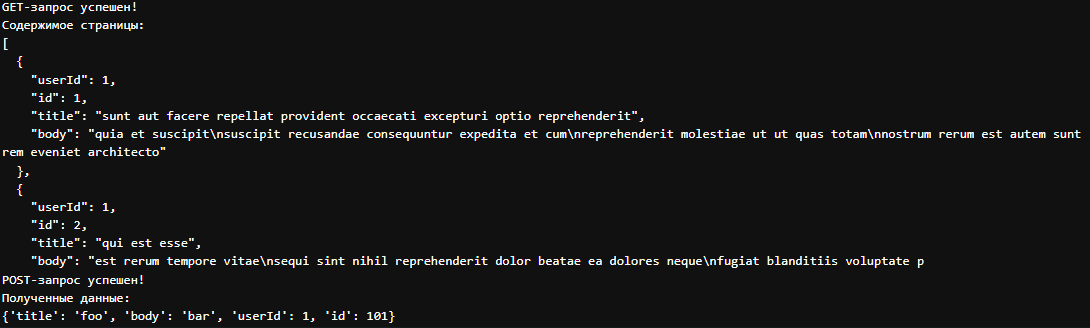

# Пример описания

In [ ]:
-------------------| LAN1 (Local Area Network) |-------------------
            Уровень приложений (Application Layer)
               [Хост (Браузер)]
                       |
                       | 1. Инициация соединения (TCP)
                       | - Установление TCP-соединения
                       | - Передача IP-адреса и порта (обычно 80 для HTTP)
                       | - Процесс:
                       | - TCP: SYN -> SYN-ACK -> ACK
                       |
                       v
               Уровень канального протокола (Data Link Layer)
               [Коммутатор]
                       |
                       | 2. Перенаправление запроса
                       | - Запрос передается на маршрутизатор
                       |
                       v

            Уровень сетевого протокола (Network Layer)
                   [Маршрутизатор]
                       |
                       | 3. Отправка HTTP-запроса
                       | - Формирование HTTP-запроса
                       | - Пример запроса: GET /index.html HTTP/1.1
                       | - Запрос передается на маршрутизатор
                       |
                       v
-------------------| LAN1 (Local Area Network) |-------------------
               Уровень сетевого протокола (Network Layer)
                   [Фаервол 1]
                       |
                       | - Фильтрация трафика на основе правил
                       |
                       v
-------------------| WAN (Wide Area Network)  |-------------------
                   [Интернет]
                       |
                       | 4. Передача запроса
                       | - Запрос разбивается на IP-пакеты
                       | - Используются протоколы TCP/IP
                       | - Пакеты проходят через маршрутизаторы
                       |
                       v
-------------------| WAN (Wide Area Network)  |-------------------
-------------------| LAN2 (Local Area Network) |-------------------
            
            Уровень приложений (Application Layer)
                   [HTTP-сервер]
                       |
                       | 5. Обработка и формирование HTTP-ответа
                       | - Сервер принимает HTTP-запрос
                       | - Обработка (взаимодействие с базой данных, генерация HTML)
                       | - Сервер формирует ответ на запрос
                       | - Ответ содержит данные, запрашиваемые клиентом
                       |
                       v
                       
            Уровень транспортного протокола (Transport Layer)
                   [HTTP-сервер]
                       |
                       | 6. Отправка HTTP-ответа
                       | - Ответ отправляется обратно в интернет
                       |
                       v
-------------------| LAN2 (Local Area Network) |-------------------
-------------------| WAN (Wide Area Network)  |-------------------
            
                   [Интернет]
                       |
                       | 8. Передача ответа
                       | - Ответ разбивается на IP-пакеты
                       | - Пакеты проходят обратно через маршрутизаторы
                       |
                       v
               Уровень сетевого протокола (Network Layer)
                   [Фаервол 1]
                       |
                       | - Фильтрация трафика на основе правил
                       |
                       v
-------------------| LAN1 (Local Area Network) |-------------------
           Уровень сетевого протокола (Network Layer)
                   [Маршрутизатор]
                       |
                       | 9. Получение ответа
                       | - Маршрутизатор получает ответ от интернет-провайдера
                       | - Ответ передается обратно в локальную сеть
                       |
                       v
           Уровень канального протокола (Data Link Layer)
                   [Коммутатор]
                       |
                       | 10. Передача данных
                       | - Получение данных от маршрутизатора
                       | - Передача данных на хост
                       |
                       v

            Уровень приложений (Application Layer)
                   [Хост (Браузер)]
                       |
                       | 11. Отображение данных
                       | - Получение HTTP-ответа
                       | - Браузер отображает данные для пользователя
                       |
                       v
                   [Пользователь]
-------------------| LAN1 (Local Area Network) |-------------------



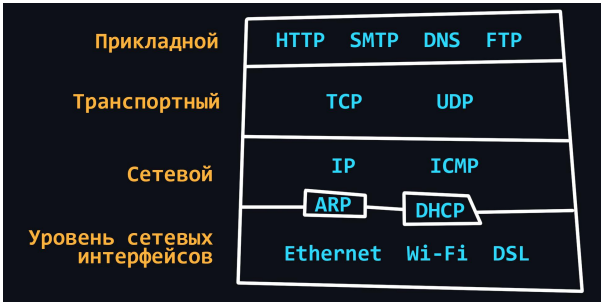
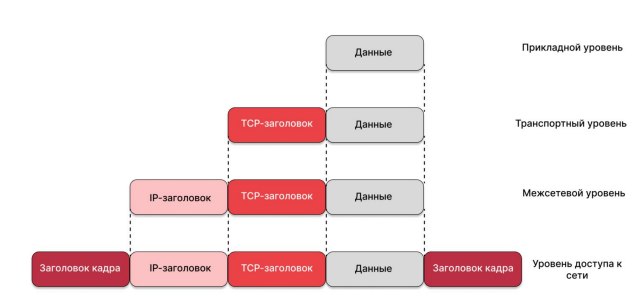
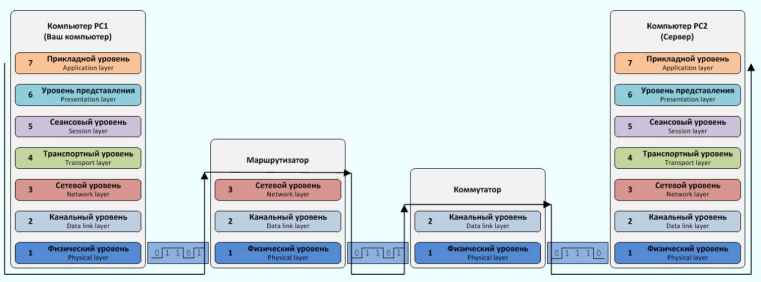

# Диагностика сети

## Пинг хоста

In [ ]:
import os
import platform

def ping(host):
    # Определяем команду для пинга в зависимости от операционной системы
    param = '-n' if platform.system().lower() == 'windows' else '-c'
    command = f"ping {param} 4 {host}"
    
    response = os.system(command)
    return response == 0

if __name__ == "__main__":
    host = input("Введите адрес хоста для пинга: ")
    if ping(host):
        print(f"{host} доступен.")
    else:
        print(f"{host} недоступен.")


### Код выполняет пинг указанного хоста и выводит сообщение о его доступности.

Введите адрес хоста для пинга:  ya.ru  
ya.ru доступен.

## Тест портов

In [ ]:
def check_open_ports():
    """Проверка открытых портов на указанном хосте."""
    import socket  # Для работы с сетевыми соединениями

    # Запрашиваем адрес хоста у пользователя
    host = input("Введите адрес хоста: ")
    # Запрашиваем порты для проверки и преобразуем их в список целых чисел
    ports = list(map(int, input("Введите порты (через запятую): ").split(',')))

    open_ports = []  # Список для хранения открытых портов
    # Проходим по каждому порту и проверяем его доступность
    for port in ports:
        with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as sock:
            sock.settimeout(1)  # Устанавливаем таймаут на 1 секунду
            # Проверяем, открыт ли порт
            if sock.connect_ex((host, port)) == 0:
                open_ports.append(port)  # Добавляем открытый порт в список

    # Выводим результаты проверки
    if open_ports:
        print(f"Открытые порты на {host}: {open_ports}")
    else:
        print(f"Нет открытых портов на {host}.")

check_open_ports()

### Код предназначен для проверки открытых портов на указанном хосте

Введите адрес хоста:  google.com  
Введите порты (через запятую):  80,443,8080  
Открытые порты на google.com: [80, 443\]  

## Тест DNS

In [ ]:
import socket

def resolve_dns(domain):
    try:
        ip = socket.gethostbyname(domain)
        return ip
    except socket.error:
        return None

def main():
    domain = input("Введите доменное имя: ")
    ip = resolve_dns(domain)
    if ip:
        print(f"IP-адрес {domain}: {ip}")
    else:
        print(f"Не удалось разрешить доменное имя {domain}.")

if __name__ == "__main__":
    main()

### Код тестирует возможность разрешения доменных имен в IP адреса и показывает, как работает DNS

Введите доменное имя:  www.google.com  
IP-адрес www.google.com: 108.177.14.147  

## Информация о провайдере

In [ ]:
def get_provider_info():
    """Получение информации о провайдере по IP-адресу."""
    import requests  # Для выполнения HTTP-запросов

    # Запрашиваем у пользователя IP-адрес
    ip = input("Введите IP-адрес: ")
    # Выполняем запрос к сервису ipinfo.io для получения информации о провайдере
    response = requests.get(f"https://ipinfo.io/{ip}/json")
    
    if response.status_code == 200:
        # Если запрос успешен, выводим информацию
        info = response.json()
        print(f"Провайдер: {info.get('org', 'Неизвестно')}")
        print(f"Город: {info.get('city', 'Неизвестно')}")
        print(f"Штат: {info.get('region', 'Неизвестно')}")
        print(f"Страна: {info.get('country', 'Неизвестно')}")
    else:
        print("Не удалось получить информацию.")  # Обработка ошибок
get_provider_info()

### Код возвращает такие данные, как название провайдера, город, регион и страна, если запрос успешен

Введите IP-адрес:  108.177.14.147  
Провайдер: AS15169 Google LLC  
Город: Kotka  
Штат: Kymenlaakso  
Страна: FI  

## Мониторинг доступности хостов с уведомлением

In [ ]:
# Нужно внести не достающие данные вместо ххх

import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
import time
import os
import platform

def ping_host(host):
    """Вспомогательная функция для пинга хоста."""
    param = '-n' if platform.system().lower() == 'windows' else '-c'
    command = f"ping {param} 1 {host}"
    response = os.system(command)
    return response == 0

def send_email(host):
    """Отправка уведомления на почту."""
    sender_email = "xxx"  # Ваш email
    receiver_email = "xxx"  # Email получателя
    password = "xxx"  # Ваш пароль

    subject = f"Хост {host} доступен"
    body = f"Хост {host} доступен для подключения."

    # Создаем сообщение
    msg = MIMEMultipart()
    msg['From'] = sender_email
    msg['To'] = receiver_email
    msg['Subject'] = subject

    msg.attach(MIMEText(body, 'plain'))

    # Отправка сообщения
    try:
        with smtplib.SMTP('smtp.bk.ru', 587) as server:
            server.starttls()  # Используем TLS
            server.login(sender_email, password)  # Вход в почтовый ящик
            server.send_message(msg)  # Отправка сообщения
        print(f"Уведомление отправлено на {receiver_email} о доступности {host}.")
    except Exception as e:
        print(f"Не удалось отправить уведомление: {e}")

def monitor_hosts():
    """Мониторинг доступности указанных хостов."""
    # Запрашиваем у пользователя адреса хостов для мониторинга
    hosts = input("Введите адреса хостов для мониторинга (через запятую): ")
    hosts = [host.strip() for host in hosts.split(',')]  # Убираем пробелы
    
    while True:  # Бесконечный цикл для постоянного мониторинга
        for host in hosts:
            # Проверяем доступность каждого хоста
            if ping_host(host):
                print(f"{host} доступен.")
                send_email(host)  # Отправка уведомления
            else:
                print(f"{host} недоступен.")
        time.sleep(5)  # Интервал 5 секунд между проверками

if __name__ == "__main__":
    monitor_hosts()


### Код выполняет мониторинг доступности заданных хостов и отправляет уведомления на электронную почту, когда хост становится доступен

Программа будет постоянно проверять доступность указанных хостов. Если какой-либо из них станет доступен, вы получите уведомление на указанный email.